### Esta libreta contiene un borrador sobre una prueba de concepto para analizar los accidentes de tráfico por barrios en lugar de distritos

In [1]:
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from IPython.display import IFrame
import ipywidgets as widgets
from ipyleaflet import Map, Marker, Icon
import pandas as pd

In [2]:
df = pd.read_csv('../Files/2023_Accidentalidad_c_g_s_d.csv' , sep = ";")

In [3]:
df['quarter'] = df['quarter'].str.replace(r'\b(?:el|la|lo|los|las|un|una|unos|unas)\b', '', regex=True)
# 2. Eliminar acentos
df['quarter'] = df['quarter'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# 3. Convertir a minúsculas
df['quarter'] = df['quarter'].str.lower()

In [4]:
df.quarter.drop_duplicates().head(10)

0     ciudad jardin
8        canillejas
10          palacio
11      castillejos
13           cortes
16       berruguete
18         butarque
19         simancas
21            arcos
23       campamento
Name: quarter, dtype: object

In [5]:
df.quarter.drop_duplicates().count()

120

In [6]:
gdf = gpd.read_file( "../Files/Barrios/Barrios.shp" , sep = ";")

In [7]:
gdf.shape

(131, 15)

In [8]:
gdf

,OBJECTID,CODDIS,NOMDIS,COD_BAR,NOMBRE,Shape_Leng,COD_DIS_TX,BARRIO_MAY,COD_DISBAR,NUM_BAR,BARRIO_MT,COD_DISB,Shape_STAr,Shape_STLe,geometry
0,132,17,Villaverde,172,San Cristóbal,4752.827446,17,SAN CRISTOBAL,172,2,SAN CRISTÓBAL,17-2,1.082492e+06,4752.827446,"POLYGON ((441930.867 4466853.189, 441929.463 4..."
1,133,17,Villaverde,173,Butarque,12641.916858,17,BUTARQUE,173,3,BUTARQUE,17-3,6.375522e+06,12641.916858,"POLYGON ((444144.857 4464473.211, 443940.236 4..."
2,134,17,Villaverde,175,Ángeles,5703.998815,17,ANGELES,175,5,ÁNGELES,17-5,1.935271e+06,5703.998815,"POLYGON ((441147.728 4466374.483, 441111.738 4..."
3,135,17,Villaverde,174,Los Rosales,5470.262628,17,LOS ROSALES,174,4,LOS ROSALES,17-4,1.540747e+06,5470.262628,"POLYGON ((442098.826 4468081.978, 442132.060 4..."
4,136,17,Villaverde,171,Villaverde Alto - Casco Histórico de Villaverde,13726.660503,17,VILLAVERDE ALTO - CASCO HISTORICO DE VILLAVERDE,171,1,VILLAVERDE ALTO - CASCO HISTÓRICO DE VILLAVERDE,17-1,9.253554e+06,13726.660503,"POLYGON ((440129.276 4468362.078, 440048.482 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,258,8,Fuencarral - El Pardo,086,Valverde,12214.176140,08,VALVERDE,86,6,VALVERDE,8-6,8.981228e+06,12214.176140,"POLYGON ((444203.866 4484758.285, 444264.176 4..."
127,259,8,Fuencarral - El Pardo,088,El Goloso,26548.956086,08,EL GOLOSO,88,8,EL GOLOSO,8-8,2.649309e+07,26548.956086,"POLYGON ((440620.784 4492208.433, 440620.465 4..."
128,260,8,Fuencarral - El Pardo,081,El Pardo,87226.068605,08,EL PARDO,81,1,EL PARDO,8-1,1.875834e+08,87226.068605,"POLYGON ((444560.283 4499365.173, 444582.369 4..."
129,261,19,Vicálvaro,191,Casco histórico de Vicálvaro,31101.747399,19,CASCO HISTORICO DE VICALVARO,191,1,CASCO HISTÓRICO DE VICÁLVARO,19-1,2.149422e+07,31101.747399,"POLYGON ((452825.125 4468280.618, 452825.243 4..."


In [9]:
gdf['NOMBRE'] = gdf['NOMBRE'].str.replace(r'\b(?:el|la|lo|los|las|un|una|unos|unas)\b', '', regex=True)
# 2. Eliminar acentos
gdf['NOMBRE'] = gdf['NOMBRE'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# 3. Convertir a minúsculas
gdf['NOMBRE'] = gdf['NOMBRE'].str.lower()

In [10]:
l1 =  df.quarter.unique()

In [11]:
l2 = gdf.NOMBRE.unique()

In [12]:
for i in l1:
    if i not in l2:
        print(i)

nan
el pilar
jeronimos
salvador
los angeles
carmenes
villaverde alto, casco historico de villaverde
concepcion
las acacias
las aguilas
barrio del aeropuerto
valderribas


In [13]:
for i in l2:
    if i not in l1:
        print(i)

angeles
villaverde alto - casco historico de villaverde
aguilas
valderrivas
acacias
los carmenes
los jeronimos
la concepcion
el salvador
alameda de osuna
aravaca
corralejos
valdemarin
casco historico de barajas
ciudad universitaria
el plantio
pilar
timon
aeropuerto
mirasierra
el goloso
el pardo


In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = "../Files/Barrios/Barrios.shp"
gdf = gpd.read_file(shapefile_path)


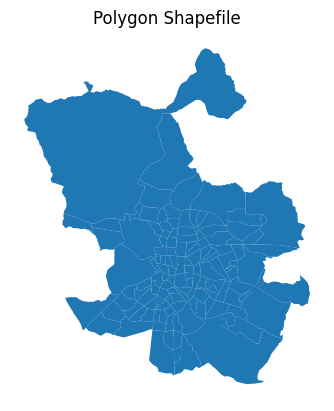

In [15]:
gdf.plot()
plt.title("Polygon Shapefile")
plt.axis('off')  # Turn off the axis
plt.show()

In [16]:
shapefile_path = "../Files/Barrios/Barrios.shp"
gdf = gpd.read_file(shapefile_path)
madrid = (40.4168, -3.7038)

map = folium.Map(location=madrid, zoom_start=10, tiles="OpenStreetMap")

folium.GeoJson(gdf).add_to(map)

map_path = "map_quarter.html"
map.save(map_path)
IFrame(src=map_path, width=800, height=900)